

# Import libraries



In [ ]:

import numpy as np
from sklearn import datasets as ds
from sklearn import tree as tr
from sklearn import metrics as mt
from sklearn import model_selection as ms
from matplotlib import pyplot as plt


## Dados Sintéticos

In [ ]:
## Dados sintéticos para produção
n_samples = 20000
n_features = 2
n_informative = 2
n_redundant = 0
random_state = 0

# Dados para treinamento
X, y = ds.make_classification(  n_samples=n_samples,
                                n_features=n_features,
                                n_informative=n_informative,
                                n_redundant=n_redundant,
                                random_state=random_state )


# Dados para produção
'''
Aqui está separando os dados em 80% para treinamento e 20% para produção ( onde será testado o modelo com dados próximo do real )
'''
X, X_prod, y, y_prod = ms.train_test_split( X, y, test_size=0.2 )



# 1.0 Treinamento da forma errada

## Não há separação dos Dados

In [ ]:

# Modelo treinado e validado com o dataset de Treinamento
model = tr.DecisionTreeClassifier( max_depth=38 ) # Aqui está passando o parâmetro max_depth=38 para o modelo

model.fit( X, y ) # Aqui está treinando o modelo

# Previsão sobre os dados de treinamento
yhat = model.predict( X ) # Aqui está fazendo a previsão sobre os dados de treinamento

acc  = mt.accuracy_score( y, yhat ) # Aqui está calculando a acurácia do modelo sobre os dados de treinamento
print( "Accuracy Over Training: {}".format( acc ) )
print('O modelo está com uma acurácio de 100%, porque ele não está aprendendo nada, ele está sendo treinado e validado com o mesmo conjunto de dado.')

Accuracy Over Training: 1.0
O modelo está com uma acurácio de 100%, porque ele não está aprendendo nada, ele está sendo treinado e validado com o mesmo conjunto de dado.


## Publicação do Modelo em Produção

In [ ]:
y_prod_hat = model.predict( X_prod ) # Aqui está fazendo a previsão sobre os dados de produção
acc  = mt.accuracy_score( y_prod, y_prod_hat ) # Aqui está calculando a acurácia do modelo sobre os dados de produção
print( "Accuracy Over Production: {}".format( acc ) )
print('Caiu a performance do modelo de 100% para 84%, porque ele está sendo treinado e validado com o mesmo conjunto de dado.')

Accuracy Over Production: 0.8455
Caiu a performance do modelo de 100% para 84%, porque ele está sendo treinado e validado com o mesmo conjunto de dado.


# 2.0 Treinamento com a Estatégia TREINO - TESTE

## Separando os dados entre Treino e Teste

In [ ]:
# Aqui está separando os dados em 80% para treinamento( X_train e y_train ) e
# 20% para teste ( X_test e y_test )

X_train, X_test, y_train, y_test = ms.train_test_split(  X, y, test_size=0.2, random_state=random_state )

## Modelo Treinado e validado com dados de Treinamento

In [ ]:
# Aqui está passando o parâmetro max_depth=38 para o modelo
model = tr.DecisionTreeClassifier( max_depth= 38 )

# Aqui está treinando o modelo com os dados de treinamento
model = model.fit( X_train, y_train )

## Previsão sobre os dados de Teste

In [ ]:
# Aqui está fazendo a previsão sobre os dados de teste
yhat_test = model.predict(X_test )

# Aqui está calculando a acurácia do modelo sobre os dados de teste
acc_test = mt.accuracy_score( y_test, yhat_test )
print( "Accuracy Over Test: {}".format( acc_test ) )

Accuracy Over Test: 0.8571875


## Escolha do melhor parâmetro


In [ ]:
values = [ i for i in range(1, 60) ]
test_score = list()

for i in values:
  model = tr.DecisionTreeClassifier( max_depth=i)
  model = model.fit(X_train, y_train )

  # Previsão sobre os dados de test
  yhat_test = model.predict(X_test)
  acc_test = mt.accuracy_score( y_test, yhat_test)
  test_score.append(acc_test)

## plot dos melhores parametros

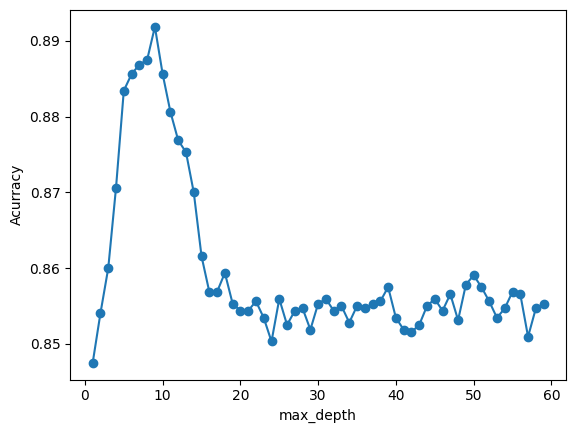

In [ ]:
plt.plot( values, test_score, '-o', label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Acurracy')
plt.show()

## Publicação do modelo em produção

In [ ]:
# Modelo de treinamento e validação com o dataset de treinamento
model_last = tr.DecisionTreeClassifier( max_depth= 10 ) # melhor parametro encontrado
model_last.fit( np.concatenate( ( X_train, X_test) ),
                  np.concatenate( (y_train, y_test)) )

model_last.fit( X_train, y_train )

# Previsão do modelo em Produção
yhat_prod = model_last.predict( X_prod )
acc_prod = mt.accuracy_score( y_prod, yhat_prod )
print( "Accuracy Over Production: {}".format( acc_prod ) )

Accuracy Over Production: 0.87975
